In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.0/869.0 kB 28.9 MB/s eta 0:00:00


In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import random
import os
import cv2
import shutil
import tqdm
import glob


In [3]:
import torch
print(f"Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")


Using torch 2.1.2 (Tesla P100-PCIE-16GB)


In [4]:
images_path = '/kaggle/input/colorful-fashion-dataset-for-object-detection/colorful_fashion_dataset_for_object_detection/JPEGImages/'
annotations_path  = '/kaggle/input/colorful-fashion-dataset-for-object-detection/colorful_fashion_dataset_for_object_detection/Annotations_txt/'
path = '/kaggle/input/colorful-fashion-dataset-for-object-detection/colorful_fashion_dataset_for_object_detection/'


In [5]:
from ultralytics import YOLO

detection_model=YOLO('yolov10m.pt')

100%|██████████| 32.1M/32.1M [00:00<00:00, 264MB/s]


WARNING ⚠️ 'line_thickness' is deprecated and will be removed in in the future. Please use 'line_width' instead.
WARNING ⚠️ 'hide_labels' is deprecated and will be removed in in the future. Please use 'show_labels' instead.



100%|██████████| 151k/151k [00:00<00:00, 15.1MB/s]


image 1/1 /kaggle/working/GRdCC.jpg: 448x640 1 person, 1 bicycle, 5 cars, 1 truck, 73.1ms
Speed: 9.1ms preprocess, 73.1ms inference, 76.8ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict


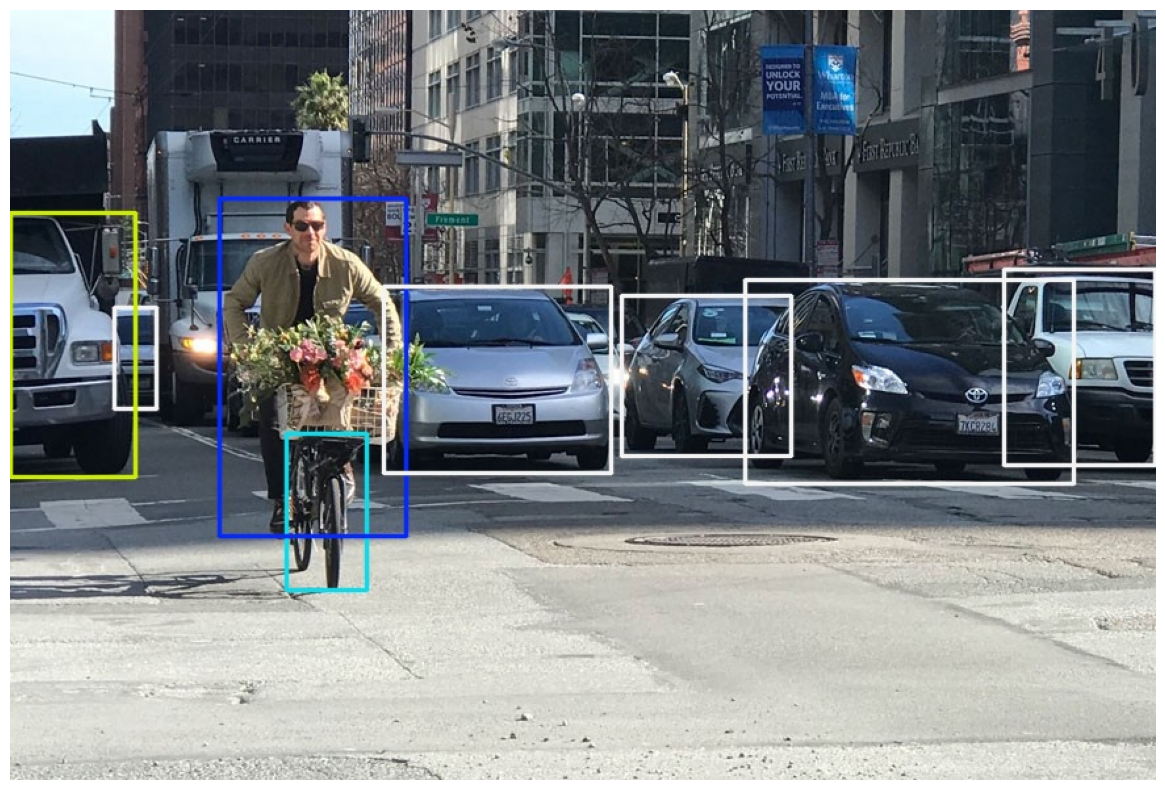

In [6]:
img = random.choice(os.listdir(images_path))

i=detection_model.predict(source='https://i.stack.imgur.com/GRdCC.jpg', conf=0.5, save=True, line_thickness=2, hide_labels=False)

im = plt.imread('/kaggle/working/runs/detect/predict/GRdCC.jpg')
plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(im)


In [7]:
import os
import random
import matplotlib.pyplot as plt
import cv2
import numpy as np


In [8]:
train = []
with open(path+'ImageSets/Main/trainval.txt', 'r') as f:
    for line in f.readlines():
        if line[-1]=='\n':
            line = line[:-1]
        train.append(line)

test = []
with open(path+'ImageSets/Main/test.txt', 'r') as f:
    for line in f.readlines():
        if line[-1]=='\n':
            line = line[:-1]
        test.append(line)


In [9]:
len(train), len(test)


(2145, 537)

In [10]:
os.mkdir('train')
os.mkdir('train/images')
os.mkdir('train/labels')

os.mkdir('test')
os.mkdir('test/images')
os.mkdir('test/labels')


In [11]:
train_path = '/kaggle/working/train/'
test_path = '/kaggle/working/test/'

print('Copying Train Data..!!')
for i in tqdm.tqdm(train):
    a = shutil.copyfile(images_path+i+'.jpg', train_path+'images/'+i+'.jpg')
    a = shutil.copyfile(annotations_path+i+'.txt', train_path+'labels/'+i+'.txt')

print('Copying Test Data..!!')
for i in tqdm.tqdm(test):
    a = shutil.copyfile(images_path+i+'.jpg', test_path+'images/'+i+'.jpg')
    a = shutil.copyfile(annotations_path+i+'.txt', test_path+'labels/'+i+'.txt')


Copying Train Data..!!


100%|██████████| 2145/2145 [00:13<00:00, 158.89it/s]


Copying Test Data..!!


100%|██████████| 537/537 [00:03<00:00, 161.32it/s]


In [12]:
text = """
train: /kaggle/working/train
val: /kaggle/working/test

# number of classes
nc: 10

# class names
names: ['sunglass','hat','jacket','shirt','pants','shorts','skirt','dress','bag','shoe']
"""
with open("data.yaml", 'w') as file:
    file.write(text)


In [13]:
model = YOLO("yolov10m.pt")

model.train(data='data.yaml', epochs=5)


Ultralytics YOLOv8.2.77 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov10m.pt, data=data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True,

100%|██████████| 755k/755k [00:00<00:00, 39.5MB/s]
2024-08-15 06:01:34,925	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-08-15 06:01:35,747	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1     78720  ultralytics.nn.modules.block.SCDown          [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1    228672  ultralytic

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.25M/6.25M [00:00<00:00, 130MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/train/labels... 2145 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2145/2145 [00:01<00:00, 1257.61it/s]


train: New cache created: /kaggle/working/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/test/labels... 537 images, 0 backgrounds, 0 corrupt: 100%|██████████| 537/537 [00:00<00:00, 1035.12it/s]

val: New cache created: /kaggle/working/test/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 129 weight(decay=0.0), 142 weight(decay=0.0005), 141 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      10.5G      2.638      4.894      3.032          7        640: 100%|██████████| 135/135 [01:39<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:07<00:00,  2.37it/s]

                   all        537       2035      0.546       0.59      0.566      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      10.4G      2.594      2.836      2.914         10        640: 100%|██████████| 135/135 [01:35<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:06<00:00,  2.80it/s]

                   all        537       2035       0.67      0.542      0.597      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      10.5G       2.62      2.639      2.947         13        640: 100%|██████████| 135/135 [01:34<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:06<00:00,  2.75it/s]

                   all        537       2035       0.63      0.615      0.628      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      10.5G      2.515       2.39      2.857         14        640: 100%|██████████| 135/135 [01:34<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:06<00:00,  2.79it/s]

                   all        537       2035      0.649      0.672      0.685      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      10.5G      2.396      2.117      2.764         17        640: 100%|██████████| 135/135 [01:34<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:06<00:00,  2.78it/s]

                   all        537       2035      0.684      0.705       0.73      0.486



5 epochs completed in 0.154 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 33.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 33.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.77 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv10m summary (fused): 369 layers, 16,461,964 parameters, 0 gradients, 63.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:09<00:00,  1.84it/s]


                   all        537       2035      0.684      0.703      0.731      0.486
              sunglass         82         82      0.527      0.204       0.29     0.0958
                   hat         77         77      0.615      0.818      0.744      0.422
                jacket        179        181      0.647      0.729      0.772       0.57
                 shirt        361        366      0.775      0.768      0.817      0.579
                 pants        114        114       0.79       0.93      0.949      0.748
                shorts        107        107      0.748      0.598      0.722       0.45
                 skirt        186        186      0.648       0.79      0.751      0.584
                 dress        128        128      0.635      0.695      0.725      0.559
                   bag        274        274      0.721      0.719      0.753      0.422
                  shoe        520        520      0.736      0.783      0.782      0.431
Speed: 0.1ms preproce

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a9a4bfea650>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0

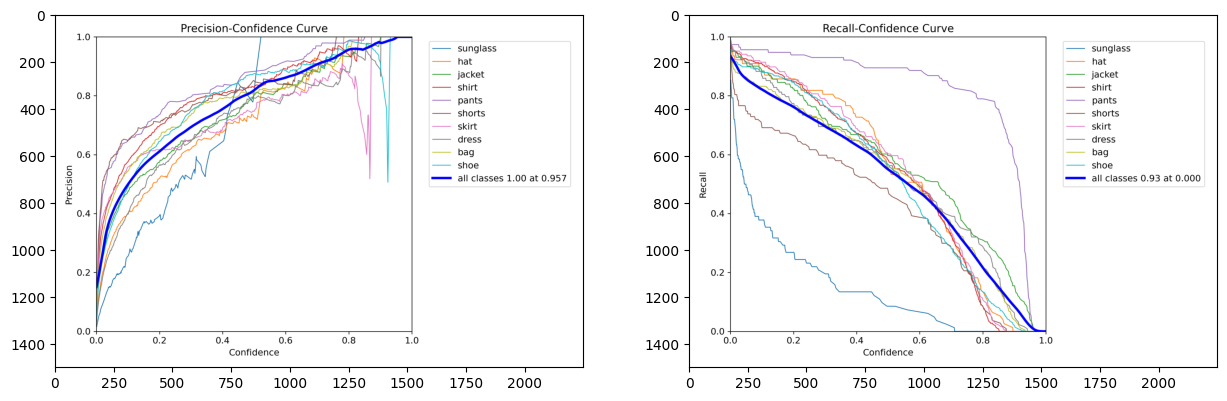

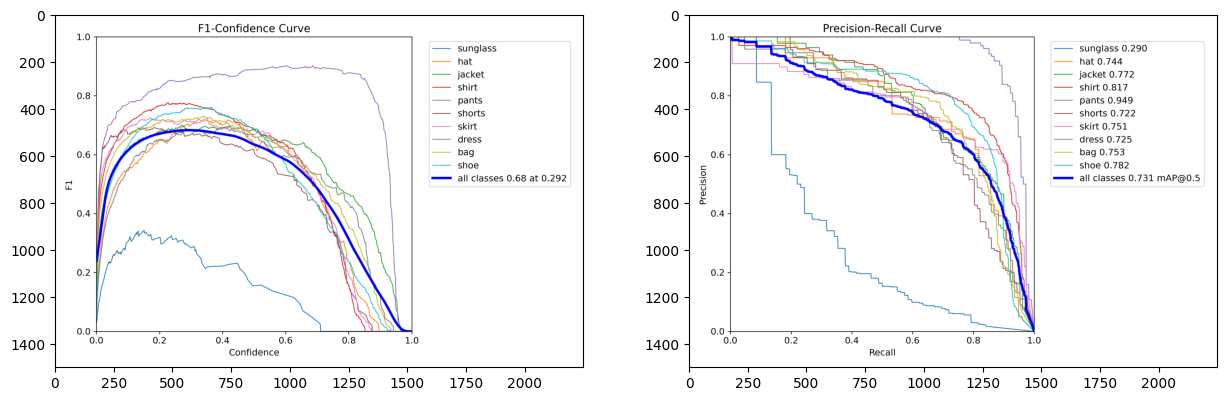

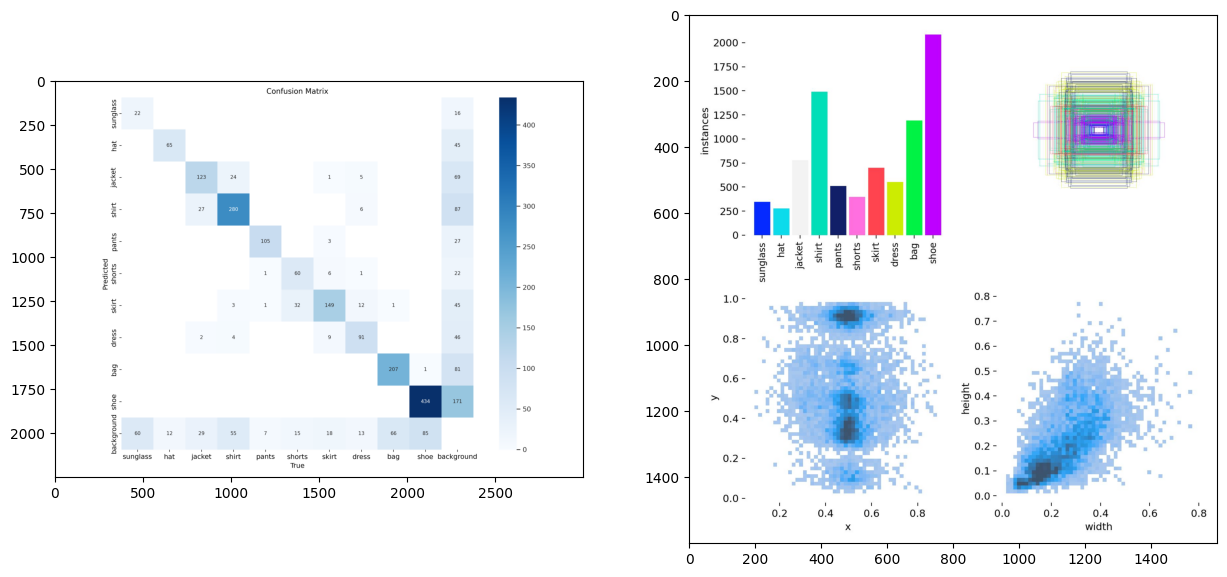

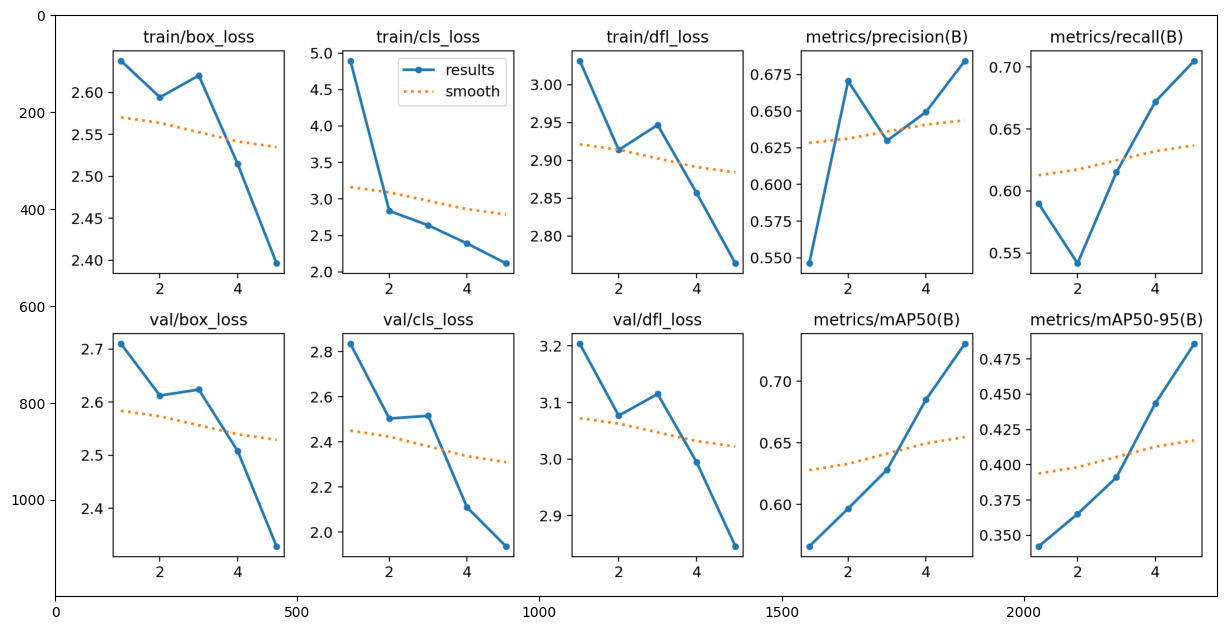

In [14]:
%matplotlib inline
model_path = 'runs/detect/train/'

def plot(ls, size):
    c=1
    plt.figure(figsize=(15,10))
    for im in ls:
        plt.subplot(size[0],size[1],c)
        im = plt.imread(model_path+im)
        plt.imshow(im)
        c+=1
    plt.show()

plot(['P_curve.png','R_curve.png'], (1,2))
plot(['F1_curve.png','PR_curve.png'], (1,2))
plot(['confusion_matrix.png','labels.jpg'], (1,2))
plot(['results.png'],(1,1))


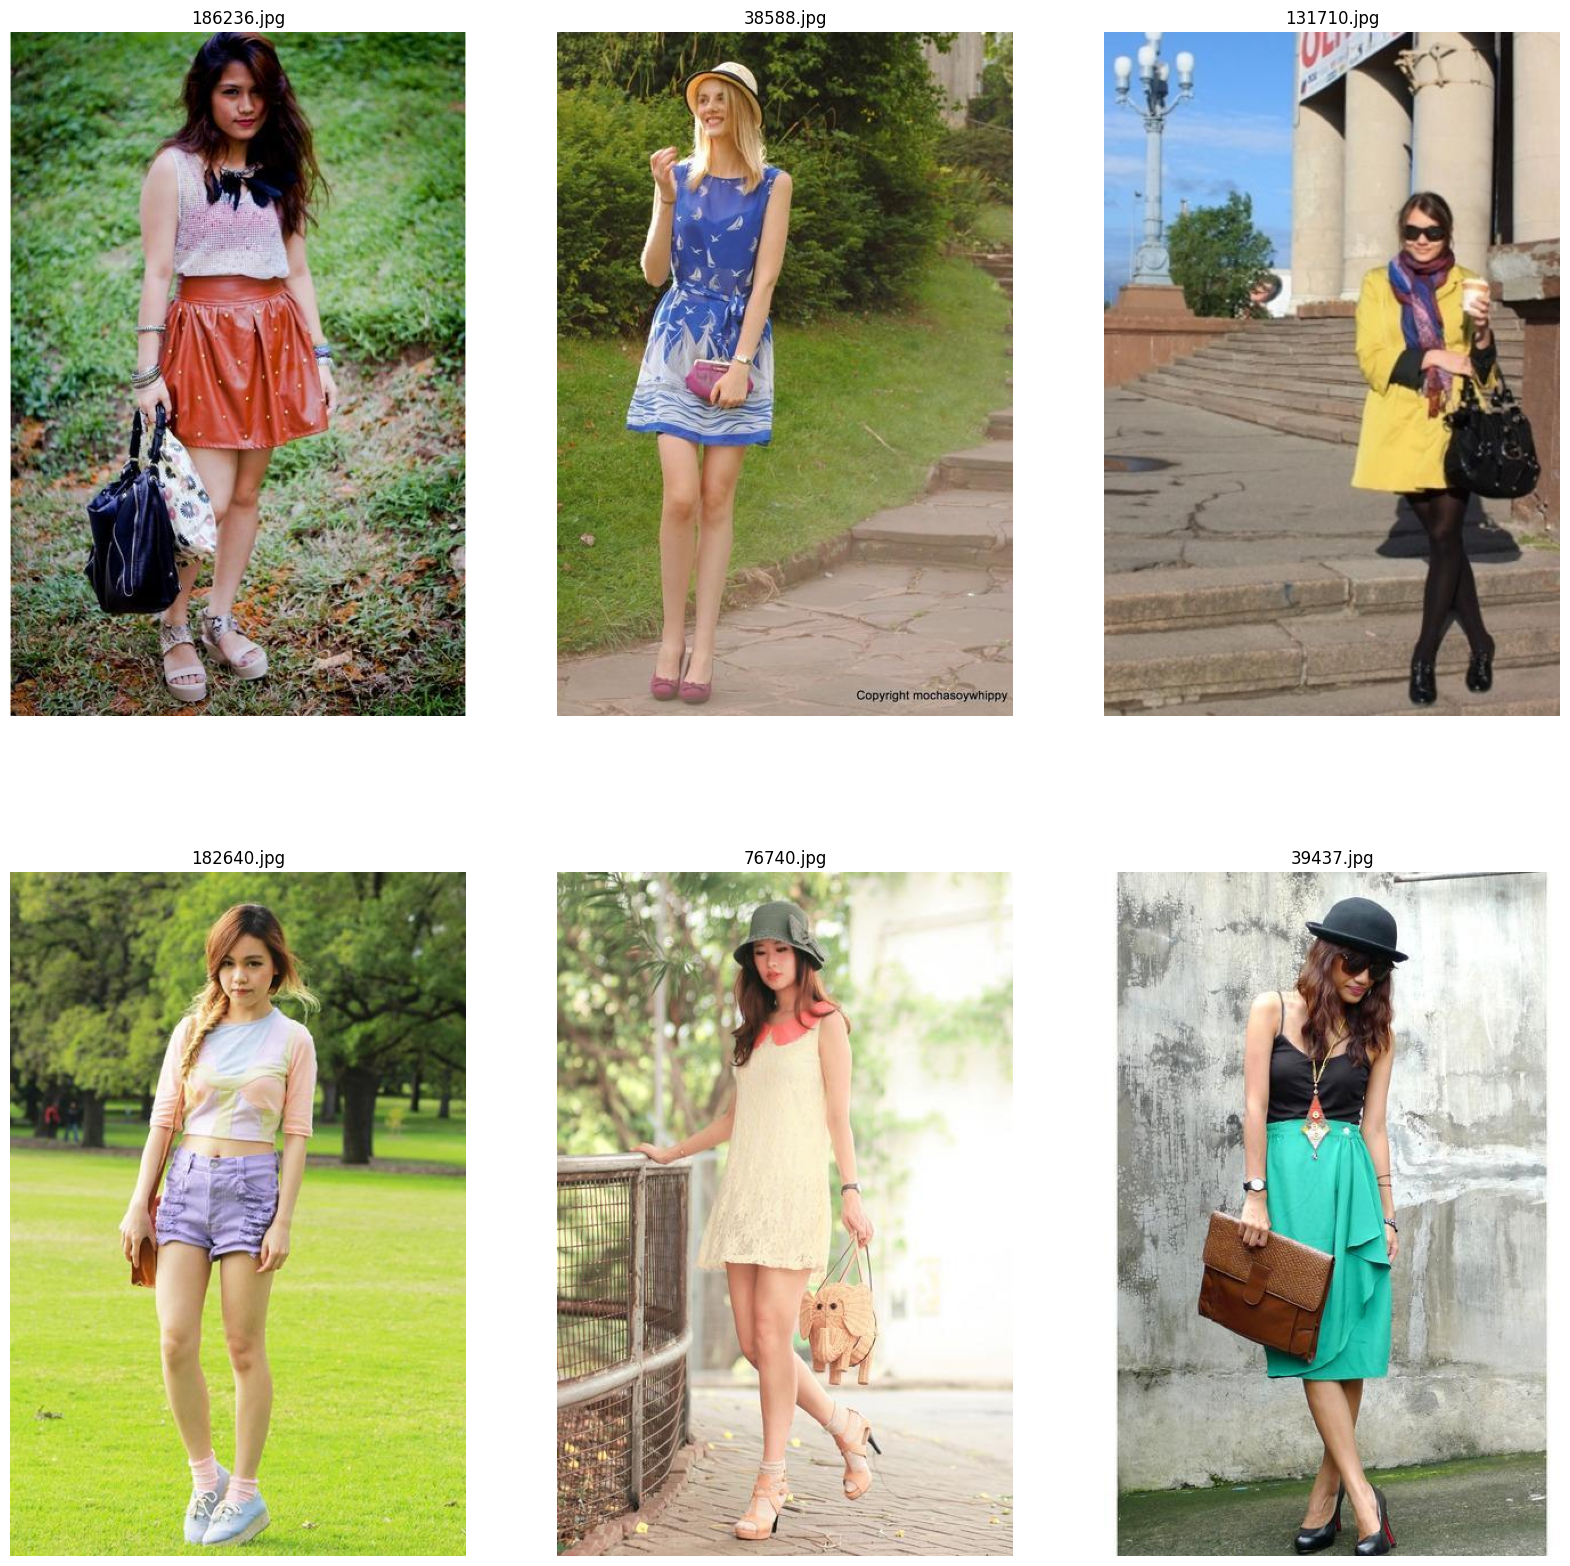

In [20]:
import shutil
import os

directory_path = '/kaggle/working/runs/detect'

# Check if the directory exists
if os.path.exists(directory_path):
    # List all folders in the directory
    folders = [f for f in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, f))]

    # Iterate through each folder and delete it
    for folder in folders:
        folder_path = os.path.join(directory_path, folder)
        shutil.rmtree(folder_path)
        print(f"Deleted folder: {folder_path}")
else:
    print(f"The directory {directory_path} does not exist.")

    
# choose random image from dataset
plt.figure(figsize=(20,20))
imgs = random.sample(os.listdir(images_path), 6)
plt.show()


image 1/1 /kaggle/input/colorful-fashion-dataset-for-object-detection/colorful_fashion_dataset_for_object_detection/JPEGImages/100034.jpg: 640x448 1 shirt, 1 skirt, 92.2ms
Speed: 1.9ms preprocess, 92.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs/detect/train


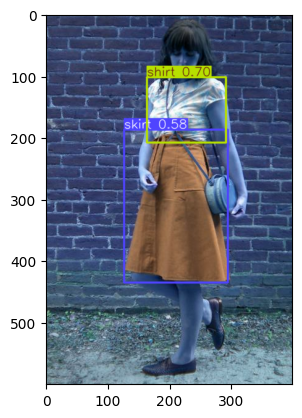

In [21]:
results=model.predict(source='/kaggle/input/colorful-fashion-dataset-for-object-detection/colorful_fashion_dataset_for_object_detection/JPEGImages/100034.jpg', conf=0.5, save=True, line_width=1, show_labels=True)
predicted_box=results[0].boxes.xyxy
image_bgr=results[0].plot()
plt.imshow(image_bgr)

In [22]:
print(predicted_box)

tensor([[163.0219, 102.9475, 291.5908, 208.9911],
        [126.5759, 187.1428, 294.7190, 435.2770]], device='cuda:0')


In [23]:
!pip install segment-anything
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


--2024-08-15 06:22:25--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.227.219.70, 13.227.219.10, 13.227.219.59, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.227.219.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: 'sam_vit_h_4b8939.pth'

sam_vit_h_4b8939.pt 100%[===================>]   2.39G   225MB/s    in 9.8s    

2024-08-15 06:22:34 (249 MB/s) - 'sam_vit_h_4b8939.pth' saved [2564550879/2564550879]



In [25]:
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint='/kaggle/working/sam_vit_h_4b8939.pth'
model_type='vit_h'

device='cuda'

sam=sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_predictor=SamPredictor(sam)

/opt/conda/lib/python3.10/site-packages/segment_anything/modeling/prompt_encoder.py:199: UserWarning: cumsum_cuda_kernel does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /usr/local/src/pytorch/aten/src/ATen/Context.cpp:71.)
  y_embed = grid.cumsum(dim=0) - 0.5
/opt/conda/lib/python3.10/site-packages/segment_anything/modeling/prompt_encoder.py:200: UserWarning: cumsum_cuda_kernel does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /usr/local/src/pytorch/aten/src/ATen/Context.cpp:71.)
  x_embed = grid.cumsum(dim=1) - 0.5


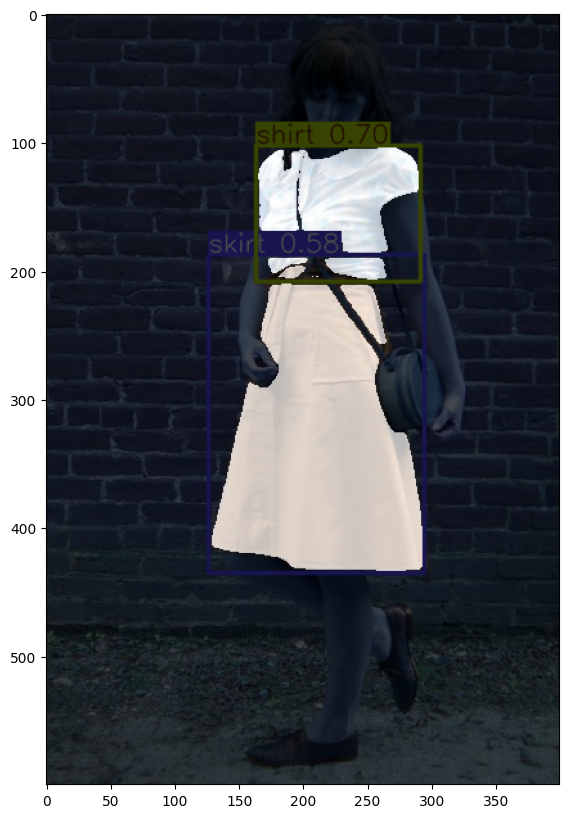

In [26]:
transformed_boxes = mask_predictor.transform.apply_boxes_torch(predicted_box, image_bgr.shape[:2])


# run SAM model on all the boxes
mask_predictor.set_image(image_bgr)
masks, scores, logits = mask_predictor.predict_torch(
   boxes = transformed_boxes,
   multimask_output=False,
   point_coords=None,
   point_labels=None
)

# combine all masks into one for easy visualization
final_mask = None
for i in range(len(masks) - 1):
  cpu_mask_i = masks[i][0].cpu().numpy()
  cpu_mask_i_plus_1 = masks[i+1][0].cpu().numpy()
  if final_mask is None:
    final_mask = np.bitwise_or(cpu_mask_i, cpu_mask_i_plus_1)
  else:
    final_mask = np.bitwise_or(final_mask, cpu_mask_i_plus_1)

# visualize the predicted masks
plt.figure(figsize=(10, 10))
plt.imshow(image_bgr)
plt.imshow(final_mask, cmap='gray', alpha=0.7)
plt.show()